In [1]:

#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Leyendo el archivo
df0 = pd.read_csv("datoeva",delimiter=',')
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
#Filtrar columnas de interés
df = df0.filter(['TIMESTAMP','AirTC_Avg'],axis=1)
df.head()

,TIMESTAMP,AirTC_Avg
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [4]:
df.dtypes

TIMESTAMP     object
AirTC_Avg    float64
dtype: object

In [5]:
#Cambiando la columna de fecha a formato fecha
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)
df = df.drop(['TIMESTAMP'], 1)
df.head()

,AirTC_Avg,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [6]:
df.dtypes

AirTC_Avg           float64
FECHA        datetime64[ns]
dtype: object

In [7]:
#Extraer año, día y hora de FECHA
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
df['DIA'] = df['FECHA'].dt.day
df['HORA'] = df['FECHA'].dt.hour
df.head()

,AirTC_Avg,FECHA,AÑO,MES,DIA,HORA
0,23.50,2018-05-11 20:10:00,2018,5,11,20
1,22.96,2018-05-11 20:20:00,2018,5,11,20
2,22.73,2018-05-11 20:30:00,2018,5,11,20
3,22.40,2018-05-11 20:40:00,2018,5,11,20
4,22.46,2018-05-11 20:50:00,2018,5,11,20


In [8]:
#Tomamos los datos mayores al primero de Noviembre del 2018
df = df[(df['FECHA'] >= "2018-11-1")]
df= df.reset_index(drop=True)
df.head()

,AirTC_Avg,FECHA,AÑO,MES,DIA,HORA
0,9.13,2018-11-01 00:00:00,2018,11,1,0
1,8.89,2018-11-01 00:10:00,2018,11,1,0
2,8.66,2018-11-01 00:20:00,2018,11,1,0
3,8.52,2018-11-01 00:30:00,2018,11,1,0
4,8.47,2018-11-01 00:40:00,2018,11,1,0


In [9]:
#Usamos las funciones agrupar y transform para sacar la temperatura media de cada hora
#agredamos estos resultados como columnas a nuestro Data Frame.
#Quitamos las columnas que ya no necesitamos.
#Redondeamos los valores a 2 decimal.
df["TEMPROM"] = np.round(df.groupby(["AÑO","MES","DIA","HORA"])["AirTC_Avg"].transform("mean"),decimals=1)
df["TMAX"] = np.round(df.groupby(["AÑO","MES","DIA"])["AirTC_Avg"].transform("max"),decimals=1)
df["TMIN"] = np.round(df.groupby(["AÑO","MES","DIA"])["AirTC_Avg"].transform("min"),decimals=1)
df = df.drop(["AirTC_Avg",'FECHA'], 1)
df.head(25)

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN
0,2018,11,1,0,8.7,29.6,6.1
1,2018,11,1,0,8.7,29.6,6.1
2,2018,11,1,0,8.7,29.6,6.1
3,2018,11,1,0,8.7,29.6,6.1
4,2018,11,1,0,8.7,29.6,6.1
5,2018,11,1,0,8.7,29.6,6.1
6,2018,11,1,1,8.5,29.6,6.1
7,2018,11,1,1,8.5,29.6,6.1
8,2018,11,1,1,8.5,29.6,6.1
9,2018,11,1,1,8.5,29.6,6.1


In [10]:
#Quitamos datos repetidos por hora y reseteamos el índice.
df = df.drop_duplicates(subset=['AÑO','MES','DIA','HORA'])
df=df.reset_index(drop=True)
df.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN
0,2018,11,1,0,8.7,29.6,6.1
1,2018,11,1,1,8.5,29.6,6.1
2,2018,11,1,2,8.7,29.6,6.1
3,2018,11,1,3,8.8,29.6,6.1
4,2018,11,1,4,7.4,29.6,6.1


In [11]:
#Hacemos un arreglo que guardará las unidades de frío de acuerdo a los 
#parámetros de la tabla.
UF = []
for i in range(0,len(df)):
    if(df['TEMPROM'][i]<=1.4):
        UF.append(0.0)
    elif(1.5<=df['TEMPROM'][i]<=2.4):
        UF.append(0.5)
    elif(2.5<=df['TEMPROM'][i]<=9.1):
        UF.append(1.0)
    elif(9.2<=df['TEMPROM'][i]<=12.4):
        UF.append(0.5)
    elif(12.5<=df['TEMPROM'][i]<=15.9):
        UF.append(0.0)
    elif(12.5<=df['TEMPROM'][i]<=15.9):
        UF.append(0.0)
    elif(16.0<=df['TEMPROM'][i]<=18.0):
        UF.append(-0.5)
    elif(18.0<=df['TEMPROM'][i]):
        UF.append(-1.0)

In [12]:
#Agregamos nueva columna al data frame con las unidades de frío
df['UF']=UF
df.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF
0,2018,11,1,0,8.7,29.6,6.1,1.0
1,2018,11,1,1,8.5,29.6,6.1,1.0
2,2018,11,1,2,8.7,29.6,6.1,1.0
3,2018,11,1,3,8.8,29.6,6.1,1.0
4,2018,11,1,4,7.4,29.6,6.1,1.0


In [13]:

#Calculamos UF acumulado para cada día
df["UF24"] = df.groupby(["AÑO","MES","DIA"])["UF"].transform("sum")
df.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF,UF24
0,2018,11,1,0,8.7,29.6,6.1,1.0,-0.5
1,2018,11,1,1,8.5,29.6,6.1,1.0,-0.5
2,2018,11,1,2,8.7,29.6,6.1,1.0,-0.5
3,2018,11,1,3,8.8,29.6,6.1,1.0,-0.5
4,2018,11,1,4,7.4,29.6,6.1,1.0,-0.5


In [14]:

#Quitamos datos repetidos por hora y reseteamos el índice.
df = df.drop_duplicates(subset=['AÑO','MES','DIA'])
df=df.reset_index(drop=True)
df.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF,UF24
0,2018,11,1,0,8.7,29.6,6.1,1.0,-0.5
1,2018,11,2,0,10.6,31.4,10.0,0.5,-9.0
2,2018,11,3,0,12.5,30.5,10.2,0.0,-9.5
3,2018,11,4,0,12.7,31.4,11.2,0.0,-11.5
4,2018,11,5,0,13.9,31.2,11.1,0.0,-8.0


In [15]:
#Quitamos columnas innecesarias
df = df.drop(['HORA','UF'], 1)
df.head()

,AÑO,MES,DIA,TEMPROM,TMAX,TMIN,UF24
0,2018,11,1,8.7,29.6,6.1,-0.5
1,2018,11,2,10.6,31.4,10.0,-9.0
2,2018,11,3,12.5,30.5,10.2,-9.5
3,2018,11,4,12.7,31.4,11.2,-11.5
4,2018,11,5,13.9,31.2,11.1,-8.0


In [16]:
#Calculamos el acumulado de UF24 y lo agregamos como columna
df['UF24CUM']=np.cumsum(df['UF24'])
df.head()

,AÑO,MES,DIA,TEMPROM,TMAX,TMIN,UF24,UF24CUM
0,2018,11,1,8.7,29.6,6.1,-0.5,-0.5
1,2018,11,2,10.6,31.4,10.0,-9.0,-9.5
2,2018,11,3,12.5,30.5,10.2,-9.5,-19.0
3,2018,11,4,12.7,31.4,11.2,-11.5,-30.5
4,2018,11,5,13.9,31.2,11.1,-8.0,-38.5


In [17]:
#Crear arreglos con la información de TMAX, TMIN y UF24CUM para realizar gráficas
Tmax = [df['TMAX'][i] for i in range(0,len(df))]
Tmin = [df['TMIN'][i] for i in range(0,len(df))]
UF24CUM = [df['UF24CUM'][i] for i in range(0,len(df))]


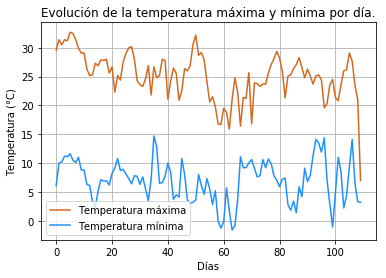

In [18]:
#Crear gráfica de evolución de temperatura mínima y máxima
Y1 = Tmax
Y2 = Tmin

plt.plot(Y1, label = "Temperatura máxima", color = '#D2691E')   
plt.plot(Y2, label = "Temperatura mínima", color = '#1E90FF')   
plt.xlabel("Días")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.grid()
plt.title('Evolución de la temperatura máxima y mínima por día.')
plt.savefig('tmin_tmax',plt=2000)
plt.show()

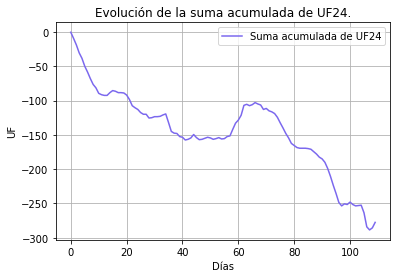

In [19]:

#Crear gráfica de evolución de temperatura mínima y máxima
Y = UF24CUM

plt.plot(Y, label = "Suma acumulada de UF24", color = '#7B68EE')   
plt.xlabel("Días")   
plt.ylabel("UF")  
plt.legend()
plt.grid()
plt.title('Evolución de la suma acumulada de UF24.')
plt.savefig('uf24cum',plt=2000)
plt.show()